# DataScience pipeline :
- pandas
- seaborn
- scikit-learn

### reading data using pand

panda is popular pythin library for data exploration exploration and analysis

In [6]:
import pandas as pd

#read csv file
#data=pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv')
data=pd.read_csv('E:/A_Project/python-tutorial/Advertising.csv',index_col=0)

#display first 5 rows
data.head()



,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


shift + Tab => to help function


In [3]:
data.tail()

NameError: name 'data' is not defined

In [18]:
data.shape

(200, 4)

<hr><hr>

# read data and check it

What are the features?
- **TV** 
- **radio**
- **Newspaper**

What are the response?
- **Sales**

because sales is contineust => it is regression

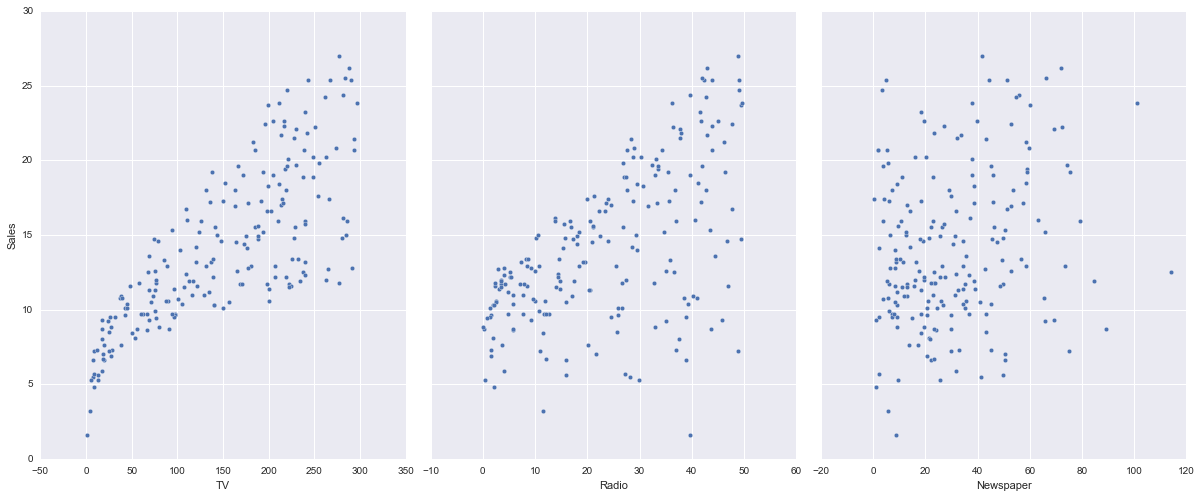

In [78]:
#visualised our data

import seaborn as sns

%matplotlib inline


#sns.pairplot(data,x_vars=['TV','Radio','Newspaper'],y_vars='Sales')
sns.pairplot(data,x_vars=['TV','Radio','Newspaper'],y_vars='Sales',size=7,aspect=0.8)


we can see that in 
- TV => we have linear regression (Strong)
- Radio => less strong
- Newspaper => weak 



ask seaborn to plot relation ship

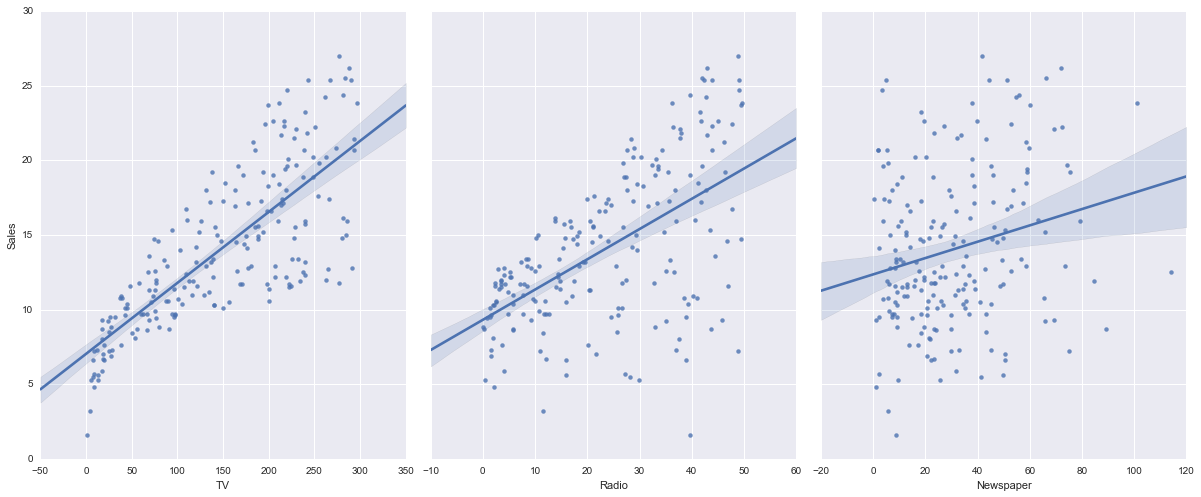

In [80]:
sns.pairplot(data,x_vars=['TV','Radio','Newspaper'],y_vars='Sales',size=7,aspect=0.8,kind='reg')

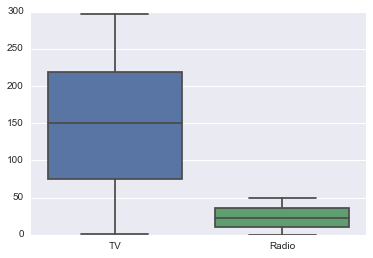

In [81]:
sns.boxplot(data=x)

# Linear regresion
-> fast 

linear regression is very poplar for regression problem

- runs quickly
- no tuning required (ex. k for knn)
- highly interpretable
- well-understood


if relationshio is not linear => it's prediction is not be accurate correctlly

**in this method it want to minimize SSE of line..**


In [39]:
#create list of feature names
feature_cols=['TV','Radio','Newspaper']

#use the list to subset
x=data[feature_cols]
# or use below code
#x= data[['TV','Radio','Newspaper']]
x.head()

y=data['Sales']
#or can use bellow code
#y=data.Sales

y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: Sales, dtype: float64

In [41]:
print type(y)
# it is series!

<class 'pandas.core.series.Series'>


# Splitting x and y for train & Test

In [46]:
from sklearn.cross_validation import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=1)



print x_train.shape
print x_test.shape
print y_train.shape
print y_test.shape

(150, 3)
(50, 3)
(150L,)
(50L,)


## Linear regression in scikit-learn


In [56]:
from sklearn.linear_model import LinearRegression

linreg=LinearRegression()

linreg.fit(x_train,y_train)

#estimated from data
print linreg.intercept_
print linreg.coef_

zip(feature_cols,linreg.coef_)

2.87696662232
[ 0.04656457  0.17915812  0.00345046]


[('TV', 0.046564567874150288),
 ('Radio', 0.17915812245088836),
 ('Newspaper', 0.0034504647111804065)]

for example TV coef is 0.4 in linear regression formula

y= 2.87 + 0.04*TV + 0.17*Radio + 0.03*Newspaper

# make prediction

In [64]:
y_pred=linreg.predict(x_test)

from sklearn import metrics

print metrics.mean_absolute_error(y_test,y_pred)

print metrics.mean_squared_error(y_test,y_pred)

import numpy as np
print np.sqrt(metrics.mean_squared_error(y_test,y_pred))

1.06689170826
1.97304562023
1.40465142303


- MAE is easiest to understant
- MSE is more popular than MAE
- RMSE is even more popular than MSE -> in terpretable in the y

<hr>
# Continued

# feature selection



In [72]:
feature_cols=['TV','Radio']

x=data[feature_cols]

y=data.Sales

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1)

linreg.fit(x_train,y_train)

y_pred=linreg.predict(x_test)

print np.sqrt(metrics.mean_squared_error(y_test,y_pred))

1.38790346994


we can see that RMSE is **decreased**

lower number for RMSE isn better

=>>> if we remove feature => it is useful


Published by : ** Mohammad khalooei** 7:45PM Sat 23July